# Case Background & Key Questions	

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of his years’ survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1)  How does health status, represented by average number of days with bad physical health in the past month (PHYSHLTH), differ by state? Also provide an indication of distribution using whatever statistics you find suitable.
 												 								
2)  Digging deeper into the data, what are some factors that impact health (i.e. demographics, behaviors, previous illness, etc.)?	
						 						
To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`. Below you will find a list of steps/questions that you will need to take in your investigation. The first part of the notebook will be focused on cleaning up your data and visualizing it.  The second part of the data set will be focused on performing statistical tests to make statements with statistical significance.  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# pd.read_csv('case_study.csv')

In [2]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (171) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [4]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

In [5]:
df['PHYSHLTH'].value_counts()

88.0    21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
77.0      493
20.0      402
14.0      326
99.0      305
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

In [6]:
practice_df = df.copy()


## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [7]:
pd.set_option('display.max_columns', 360)


In [8]:
# Reassign df to df with only tri states
df = df[df['_STATE'].isin([9,34,36])]

Now check to see how large our subset df.

In [9]:
# your code here
df.shape

(34545, 358)

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code.

In [10]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [11]:
df['PHYSHLTH'].value_counts()

88.0    21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
77.0      493
20.0      402
14.0      326
99.0      305
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

In [12]:
# Check if there are any NaN values
df['PHYSHLTH'].isna().sum()

0

In [13]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

In [14]:
# Looking at codebook, we want to change 88 to 0, 77 to np.nan, 99 to np.nan as these will affect 
# our descriptive statistics if not changed

conditions = [
    df['PHYSHLTH'].eq(88),
    df['PHYSHLTH'].eq(77),
    df['PHYSHLTH'].eq(99)
]

choices = [
    0,
    np.nan,
    np.nan
]

df['PHYSHLTH'] = np.select(conditions, choices, df['PHYSHLTH'])


In [15]:
# Check if there are NaN values
df['PHYSHLTH'].isna().sum()

798

In [16]:
# Drop NaN values
df['PHYSHLTH'].dropna(inplace=True)

In [17]:
# Check if NaN were dropped
df['PHYSHLTH'].isna().sum()

0

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a graph shows the distribution of the data.

In [18]:
# descriptive statistics
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

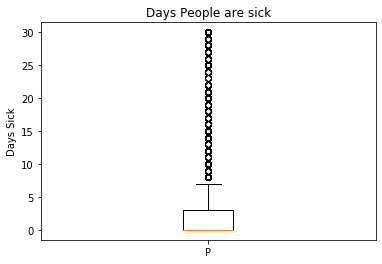

In [19]:
# Graph boxplot
plt.boxplot(df['PHYSHLTH']);
plt.title('Days People are sick');
plt.ylabel('Days Sick');
plt.xticks([1], ['P']);

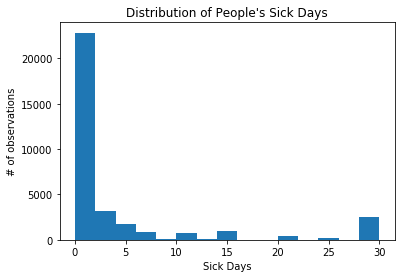

In [20]:
# Graphic the distribution of data
# Use histogram
plt.hist(df['PHYSHLTH'], bins=15);
plt.title('Distribution of People\'s Sick Days');
plt.ylabel('# of observations');
plt.xlabel('Sick Days');

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [21]:
df['PHYSHLTH'].isna().sum()

0

In [22]:
# Create bar graph using matplotlib by states - xaxis = state, y-axis = avg days sick

In [23]:
# Part 1. Convert 9 -> 'Conn', 34 -> 'NJ', 36-> 'NY'
conditions = [
    df['_STATE'].eq(9),
    df['_STATE'].eq(34),
    df['_STATE'].eq(36)
]

choices = [
    'Conn',
    'NJ',
    'NY'
]

df['_STATE'] = np.select(conditions, choices, df['_STATE'])
df['_STATE']

49938     Conn
49939     Conn
49940     Conn
49941     Conn
49942     Conn
          ... 
303774      NY
303775      NY
303776      NY
303777      NY
303778      NY
Name: _STATE, Length: 34545, dtype: object

In [24]:
df['PHYSHLTH'].isna().sum()

798

In [25]:
# Calculate average number of sick days by state
tri_state_mean = df.groupby('_STATE').mean()['PHYSHLTH']

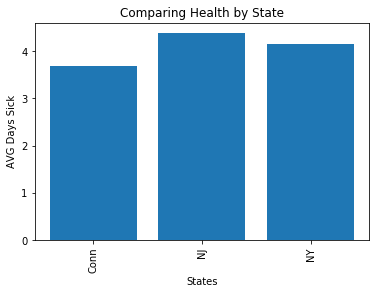

In [26]:
# Part 2: Graph
plt.bar(tri_state_mean.index, tri_state_mean);
plt.title('Comparing Health by State');
plt.ylabel('AVG Days Sick');
plt.xlabel('States')
plt.xticks(rotation=90);

In [27]:
df[df['_STATE'].eq('Conn')]['PHYSHLTH']

49938     0.0
49939     0.0
49940     2.0
49941     0.0
49942     0.0
         ... 
60521     0.0
60522     0.0
60523    30.0
60524     0.0
60525    14.0
Name: PHYSHLTH, Length: 10588, dtype: float64

In [28]:
df['PHYSHLTH'].isna().sum()

798

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


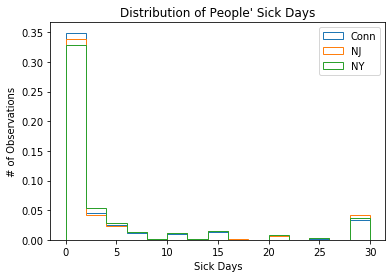

In [29]:
# Graph histogram of data 
# plt.style.use('seaborn-deep');
plt.hist(df[df['_STATE'].eq('Conn')]['PHYSHLTH'], density=True, histtype='step', bins=15, label='Conn');
plt.hist(df[df['_STATE'].eq('NJ')]['PHYSHLTH'], density=True, histtype='step', bins=15, label='NJ');
plt.hist(df[df['_STATE'].eq('NY')]['PHYSHLTH'], density=True, histtype='step', bins=15, label='NY');
plt.title('Distribution of People\' Sick Days');
plt.xlabel('Sick Days');
plt.legend();
plt.ylabel('# of Observations');
plt.show();

import seaborn as sns
sns.set_style("dark")
rc = {'figure.figsize':(6,4),
      'axes.grid' : True,
      'grid.color': '.8',
      'font.family':'Times New Roman',
      'font.size' : 15}
plt.rcParams.update(rc);
sns.distplot(df[df['_STATE'].eq('Conn')]['PHYSHLTH'], kde=False, bins=13, hist_kws={"histtype": "step", "linewidth": 0.7,
                            "alpha": 0.7, "color": "r"});
sns.distplot(df[df['_STATE'].eq('NJ')]['PHYSHLTH'], kde=False, bins=13, hist_kws={"histtype": "step", "linewidth": 0.7,
                            "alpha": 0.7, "color": "g"});
sns.distplot(df[df['_STATE'].eq('NY')]['PHYSHLTH'], kde=False, bins=13, hist_kws={"histtype": "step", "linewidth": 0.7,
                            "alpha": 0.7, "color": "b"});
# sns.set_axis_labels('# of Observations', 'PHYSHLTH')
plt.title('Distribution of People\'s Sick Days')
plt.xlabel('PHYSHLTH')
plt.ylabel('# of Observations')
plt.legend();
plt.show;

In [30]:
df['PHYSHLTH'].isna().sum()

798

In [31]:
# graphic showing the histogram of data



## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [32]:
# code to create new colum for chronically sick

df['chron'] = np.where(df['PHYSHLTH']>12, 1, 0)
df['chron'].value_counts()


0    30296
1     4249
Name: chron, dtype: int64

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [33]:
# Calculate averages per state for chron column
df.groupby('_STATE')['chron'].mean()

_STATE
Conn    0.110880
NJ      0.134011
NY      0.122949
Name: chron, dtype: float64

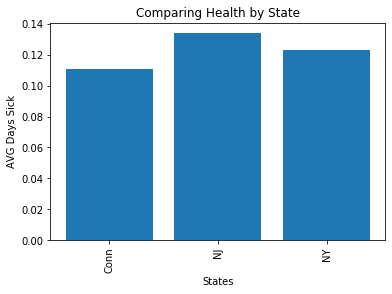

In [34]:
# create bar graph to compare chronically sick people by state
plt.bar(df.groupby('_STATE')['chron'].mean().index, df.groupby('_STATE')['chron'].mean());
plt.title('Comparing Health by State');
plt.xlabel('States');
plt.ylabel('AVG Days Sick')
plt.xticks(rotation=90);

## 6. Independent Variables (categorical)

Does smoking affect the number of days people feel physically ill? 
Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`. When cleaning this data you will find that many respondents were not asked that question. read the codebook to understand why, and use that information when cleaning up your data. I.E, you will need to process two columns in order to create a new column of smokers.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [35]:
# NOTES:
# SMOKDAY2 - { 1: Every day, 2: Some days, 3: Not at all, 7: dont know, 9: Refused, 'blank'}
# SMOKE100 - {}

In [36]:
# Find if there are any NaN values in SMOKDAY2
df['SMOKDAY2'].isna().sum()

20762

In [37]:
df['SMOKDAY2'].value_counts()

3.0    9703
1.0    2676
2.0    1371
9.0      27
7.0       6
Name: SMOKDAY2, dtype: int64

In [38]:
df['SMOKE100'].value_counts()

2.0    19087
1.0    13795
7.0      174
9.0       51
Name: SMOKE100, dtype: int64

Explain reasoning: 


In [39]:
# From SMOKE100, replace 7-> SMOKDAY2 7, 9-> SMOKDAY2 9, 2-> SMOKDAY2 3
conditions = [
    df['SMOKE100'].eq(7),
    df['SMOKE100'].eq(9),
    df['SMOKE100'].eq(2)
]
choices = [
    7,
    9,
    3
]

df['SMOKDAY2'] = np.select(conditions, choices, df['SMOKDAY2'])


In [40]:
# Check if there are any missing values in SMOKDAY2
df['SMOKDAY2'].isna().sum()

1450

In [41]:
# Drop NaN values
# df['SMOKDAY2'].dropna(inplace=True)
df.dropna(subset=['SMOKDAY2'], axis=0, inplace=True)
# Check if dropped
df['SMOKDAY2'].isna().sum()


0

In [42]:
# Check the values
df['SMOKDAY2'].value_counts()

3.0    28790
1.0     2676
2.0     1371
7.0      180
9.0       78
Name: SMOKDAY2, dtype: int64

In [43]:
# Change the values for categories
conditions = [
    df['SMOKDAY2'].eq(1),
    df['SMOKDAY2'].eq(2),
    df['SMOKDAY2'].eq(3),
    df['SMOKDAY2'].eq(7),
    df['SMOKDAY2'].eq(9),
]
choices = [
    "Every day",
    "Some days",
    "Not at all",
    "Don\'t know",
    "Refused",
]
df['SMOKDAY2'] = np.select(conditions, choices, df['SMOKDAY2'])


In [44]:
df['SMOKDAY2'].value_counts()

Not at all    28790
Every day      2676
Some days      1371
Don't know      180
Refused          78
Name: SMOKDAY2, dtype: int64

In [45]:
df['SMOKDAY2'].isna().sum()

0

In [46]:
df['SMOKDAY2'].value_counts()

Not at all    28790
Every day      2676
Some days      1371
Don't know      180
Refused          78
Name: SMOKDAY2, dtype: int64

In [47]:
# code to graph those proportion of  smoking groups from different states using matplotlib


In [48]:
df['SMOKDAY2'].isna().sum()

0

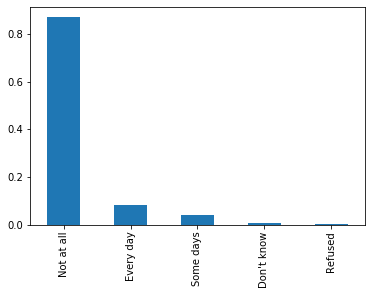

In [49]:
# code to graph those proportion of different smoking groups using matplotlib
df['SMOKDAY2'].value_counts(normalize=True).plot.bar();

In [50]:
for each in df.groupby('_STATE')['SMOKDAY2']:
    print (each)

('Conn', 49938    Not at all
49939    Not at all
49940    Not at all
49941    Not at all
49942    Not at all
            ...    
60521    Not at all
60522    Not at all
60523    Not at all
60524    Not at all
60525    Not at all
Name: SMOKDAY2, Length: 10171, dtype: object)
('NJ', 273284    Not at all
273285    Not at all
273286    Not at all
273287    Not at all
273288    Not at all
             ...    
284987    Not at all
284988    Not at all
284989    Not at all
284990    Not at all
284991    Not at all
Name: SMOKDAY2, Length: 11304, dtype: object)
('NY', 291530    Not at all
291531    Not at all
291532    Not at all
291534     Some days
291535    Not at all
             ...    
303774     Every day
303775    Not at all
303776    Not at all
303777       Refused
303778    Not at all
Name: SMOKDAY2, Length: 11620, dtype: object)


In [51]:
pd.crosstab(df['_STATE'], df['SMOKDAY2'], normalize='index')

SMOKDAY2,Don't know,Every day,Not at all,Refused,Some days
_STATE,,,,,
Conn,0.006882,0.070101,0.885655,0.002851,0.034510
NJ,0.006989,0.082006,0.866861,0.001327,0.042817
NY,0.002668,0.089157,0.859122,0.002926,0.046127


In [52]:
pd.crosstab(df['_STATE'], df['SMOKDAY2'], normalize='index')

SMOKDAY2,Don't know,Every day,Not at all,Refused,Some days
_STATE,,,,,
Conn,0.006882,0.070101,0.885655,0.002851,0.034510
NJ,0.006989,0.082006,0.866861,0.001327,0.042817
NY,0.002668,0.089157,0.859122,0.002926,0.046127


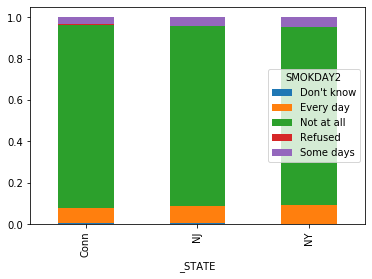

In [53]:
pd.crosstab(df['_STATE'], df['SMOKDAY2'], normalize='index').plot.bar(stacked=True);

In [54]:
# graph showing the breakdown of smokers per state
df.groupby('SMOKDAY2')['PHYSHLTH'].mean()

SMOKDAY2
Don't know    3.868263
Every day     6.653007
Not at all    3.764435
Refused       4.621212
Some days     6.295659
Name: PHYSHLTH, dtype: float64

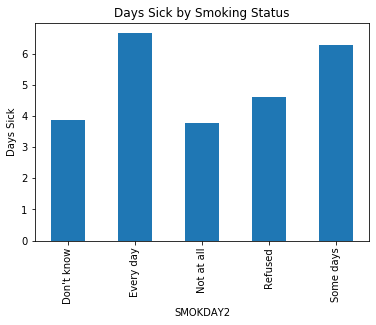

In [55]:
# graph bar graph with average sick days for each category of smoking status
df.groupby('SMOKDAY2')['PHYSHLTH'].mean().plot.bar();
plt.title('Days Sick by Smoking Status')
plt.ylabel('Days Sick');


## 7. Independent Variables (continuous):

Does the amount of days a person drinks affect the number of days they feel physically ill?
To investigate this, let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [56]:
df.ALCDAY5.value_counts()

888.0    13043
201.0     3027
202.0     2324
101.0     1596
203.0     1350
102.0     1232
230.0     1164
205.0     1156
204.0     1144
210.0      840
103.0      782
107.0      710
220.0      650
215.0      590
206.0      389
104.0      386
208.0      369
105.0      352
207.0      278
225.0      265
777.0      225
999.0      201
212.0      144
106.0      109
228.0       56
214.0       53
229.0       31
209.0       28
227.0       24
218.0       19
216.0       15
226.0       15
224.0       14
222.0       13
221.0       13
213.0       11
211.0       10
217.0        7
223.0        2
219.0        1
Name: ALCDAY5, dtype: int64

In [57]:
# code here to clean up the ALCDAY5 responses
# 1. 101-107 * 4
# 2. 201-230  * 1
# 3. 777 -> np.nan
# 4. 888 -> 0
# 5. 999 -> np.nan

In [58]:
df.ALCDAY5.isna().sum()

457

In [59]:
# clean up
# if value is between 100 and 107, subtract 100 then  multiply by 4
# if value is between 200-230, subtract 200
# if value is 888, then 0
# if value is 777, then np.nan
# if value is 999, then np.nan

conditions = [
    (100 < df['ALCDAY5']) & (df['ALCDAY5'] < 108),
    (df['ALCDAY5'] > 200) & (df['ALCDAY5'] < 231),
    df['ALCDAY5'].eq(888),
    df['ALCDAY5'].eq(777),
    df['ALCDAY5'].eq(999)
]

choices = [
    (df['ALCDAY5'] - 100) * 4,
    (df['ALCDAY5'] - 200),
    0,
    np.nan,
    np.nan
]

df['ALCDAY5'] = np.select(conditions, choices, df['ALCDAY5'])

In [60]:
df.ALCDAY5.value_counts()

0.0     13043
1.0      3027
4.0      2740
2.0      2324
8.0      1601
3.0      1350
30.0     1164
5.0      1156
20.0     1002
12.0      926
10.0      840
28.0      766
15.0      590
16.0      401
6.0       389
7.0       278
25.0      265
24.0      123
14.0       53
29.0       31
9.0        28
27.0       24
18.0       19
26.0       15
22.0       13
21.0       13
13.0       11
11.0       10
17.0        7
23.0        2
19.0        1
Name: ALCDAY5, dtype: int64

In [61]:
# check how many nan values
df['ALCDAY5'].isna().sum()

883

In [62]:
# Drop Nan
df.dropna(subset=['ALCDAY5'], axis=0, inplace=True)

In [63]:
df['ALCDAY5'].isna().sum()

0

In [64]:
#descriptive statistics of cleaned data
df['ALCDAY5'].describe()

count    32212.000000
mean         5.295697
std          8.175906
min          0.000000
25%          0.000000
50%          2.000000
75%          7.000000
max         30.000000
Name: ALCDAY5, dtype: float64

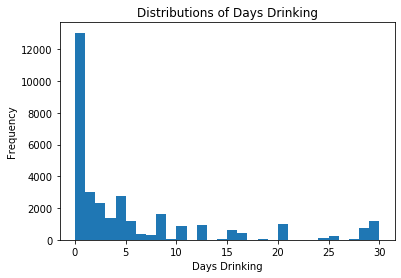

In [65]:
# graph histogram of data
df['ALCDAY5'].plot.hist(bins=30);
plt.title('Distributions of Days Drinking');
plt.xlabel('Days Drinking');

In [66]:
# 4. Generate graphics that show how the responses to this variable might differ by state.
df.groupby('_STATE').ALCDAY5.mean()


_STATE
Conn    6.004043
NJ      4.887713
NY      5.073933
Name: ALCDAY5, dtype: float64

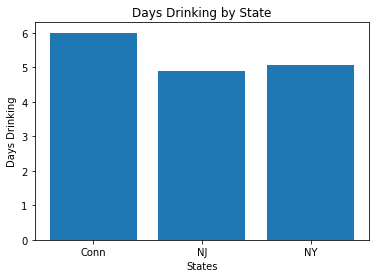

In [67]:
plt.bar(df.groupby('_STATE').ALCDAY5.mean().index, df.groupby('_STATE').ALCDAY5.mean());
plt.title('Days Drinking by State');
plt.xlabel('States');
plt.ylabel('Days Drinking');

In [68]:
# Average by state
df.groupby('_STATE')['ALCDAY5'].mean()

_STATE
Conn    6.004043
NJ      4.887713
NY      5.073933
Name: ALCDAY5, dtype: float64

In [69]:
# Code to calculate correlation of between number of dirnks of number of days physically ill
df[['ALCDAY5', 'PHYSHLTH']].corr()['PHYSHLTH']


ALCDAY5    -0.090443
PHYSHLTH    1.000000
Name: PHYSHLTH, dtype: float64

In [70]:
df[['ALCDAY5', 'PHYSHLTH']].corr()['PHYSHLTH'][0]

-0.09044343519079337

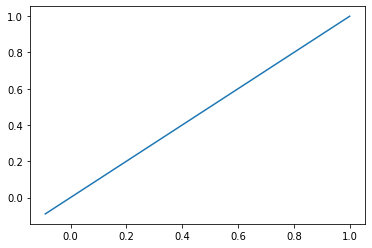

In [71]:
plt.plot(df[['ALCDAY5', 'PHYSHLTH']].corr()['PHYSHLTH'], df[['ALCDAY5', 'PHYSHLTH']].corr()['PHYSHLTH']);

In [72]:
# df[['PHYSHLTH', 'ALCDAY5']]

## 8. Statistical Inference


- Create a 95% confidence interval for the population mean of physically ill days.

In [73]:
# in order to calculate confidence interval, I need to find mean, std, and sample size
# We do not know population variance and our sample size is bigger than 30 -> we will be using t-dist
import scipy.stats as stats
import math

ill_mean = df['PHYSHLTH'].mean()
ill_std = df['PHYSHLTH'].std()
ill_n = len(df['PHYSHLTH'])

print(ill_mean, ill_std, ill_n)

print(stats.t.interval(alpha=0.95, loc=ill_mean, df=ill_n - 1, scale=ill_std/math.sqrt(ill_n)))

print(stats.norm.interval(alpha=0.95, loc=ill_mean, scale=ill_std/math.sqrt(ill_n)))

# CI FORMULA - sample statistics +- margin of error
# margin of error formula = CV * (ill_std / sqrt(n))

4.106463275402765 8.525789524650913 32212
(4.013354594853562, 4.199571955951969)
(4.013358093515157, 4.199568457290374)


In [74]:
# at 95% confidence level, calculate CI using formula
z_cv = 1.96
_moe = 1.96 * (ill_std / math.sqrt(ill_n))
print('margin of error:', _moe)
# calculate CI
_ci = (ill_mean - _moe, ill_mean + _moe)
print('We are 95% confident that our population mean of sick days are between ', _ci)

margin of error: 0.09310689274861167
We are 95% confident that our true paramter population mean of sick days are between  (4.013356382654154, 4.199570168151377)


-  Create a 95% confidence interval for the true proportion of chronically sick people.

In [75]:

# assign variables
chron_mean = df['chron'].mean()
chron_std = df['chron'].std()
chron_n = len(df['chron'])
_moe = 1.96 * (chron_std / math.sqrt(chron_n))
print('chronically sick mean:', chron_mean, 'std:', chron_std, 'number of chron:', len(df['chron']))


chronically sick mean: 0.12389792623866881 std: 0.3294701807346195 number of chron: 32212


In [76]:
# manually
_ci = (chron_mean - _moe, chron_mean + _moe)
print('ci manual:', _ci)

ci manual: (0.12029990816740052, 0.1274959443099371)


In [77]:
from statsmodels.stats.proportion import proportion_confint   

# at 95% confidence interval for the true proportion of df['chron']
print(df['chron'].value_counts())

# ci_low, ci_upp = stats.proportion.proportion_confint(count, nobs, alpha=0.05, method='normal')
ci_chron = proportion_confint(count=df['chron'].value_counts()[1], nobs=chron_n, alpha=(1 - 0.95))
print("We are 95% confident that the true proportion of people being chronically sick will be in between ", ci_chron)

0    28221
1     3991
Name: chron, dtype: int64
We are 95% confident that the true proportion of people being chronically sick will be in between  (0.12030003013026809, 0.12749582234706955)


## 9. Hypothesis Tests 

**For the follwing questions that require hypothesis tests, you must complete the following:**

*1. Write down the null and alternative hypothesis you are testing.* 

*2. Select the appropriate test and calculate the test statistic and P-values.*

*3. Determine the critical value for the 95% confidence interval.*

*4. Evaluate the test statistic agains the critical value.*

*5. Determine if you reject or fail to reject the null hypothesis and write a sentence explaining the results of your hypothesis test.*  

### The following questions are regarding the `PHYSHLTH` variable. 
- What is the probability of getting this sample mean for days physically ill, if the population mean is 4?
- Is there a statistically significant difference between men and women in the number of days a person feels phsyically ill?
- Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states. 


In [78]:
df['PHYSHLTH'].isna().sum()
df.dropna(subset=['PHYSHLTH'], inplace=True)
df['PHYSHLTH'].isna().sum()

0

In [79]:
df['PHYSHLTH'].value_counts()

0.0     19823
30.0     2290
2.0      1873
1.0      1438
3.0      1133
5.0      1028
10.0      701
7.0       607
15.0      599
4.0       581
20.0      378
14.0      313
6.0       176
25.0      151
8.0        94
12.0       64
21.0       63
28.0       54
29.0       29
18.0       19
27.0       19
16.0       16
9.0        15
17.0       14
22.0       11
13.0        9
11.0        8
19.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

In [80]:
df['PHYSHLTH'].isna().sum()

0

In [140]:
# PART 1: What is the probability of getting this sample mean for days physically ill, if the population mean is 4?
mu_physhlth = 4
# 1. Hypothesis
# Ho: mu_physhlth = 4
# H1: mu_physhlth != 4
# NOTE: physhlth is continuous variable we can use one sample t test
# 2. Select which test to use and calculate test stat and p-value
# Use t-test as population variance is unknown, n>= 30

# at 95% CL, 
# two tailed test
crit_value = stats.t.ppf(0.975, len(df['PHYSHLTH']) - 1)

# print(crit_value)
# t-score value is 
t_stat, p_value = stats.ttest_1samp(df['PHYSHLTH'], 4, nan_policy='omit')
# Our t-stat value is 2.2173 and p-value is 0.0266
print(f'T_STAT: {t_stat}, CRIT_VALUE: {crit_value}, P_VALUE: {p_value}')
# Calculate t-test stat:


# find_ttest

print(f'As we know our t-stat value is critical value at 95% confidence level, we know we can reject hypothesis as t-stat value is in rejection area and also p-value is greater than alpha so we can reject hypothesis')

T_STAT: 2.2173843358773504, CRIT_VALUE: 1.9600392235349446, P_VALUE: 0.02660394179097971
As we know our t-stat value is critical value at 95% confidence level, we know we can reject hypothesis as t-stat value is in rejection area and also p-value is greater than alpha so we can reject hypothesis


In [82]:
df.SEX.value_counts()


2.0    17742
1.0    13773
9.0       17
Name: SEX, dtype: int64

In [83]:
# PART 2: Is there a statistically significant difference between men and women in the number of days a person feels phsyically ill?
# DATA CLEANING FOR SEX COLUMN
# Check SEX column 
df.SEX.value_counts()

# Clean SEX column - 1 = 'Male', 2= 'Female', 9 = np.nan ('refused')


conditions = [
    df.SEX.eq(1),
    df.SEX.eq(2),
    df.SEX.eq(9)
]


choices = [
    'Male',
    'Female',
    np.nan
]

df['SEX'] = np.select(conditions, choices, df['SEX'])




In [84]:
df.SEX.isna().sum()

0

In [85]:
df.SEX.isnull().sum()

0

In [86]:
df.SEX.value_counts()

Female    17742
Male      13773
nan          17
Name: SEX, dtype: int64

In [87]:
df.groupby('SEX')['PHYSHLTH'].agg(['count', 'mean', 'std'])

,count,mean,std
SEX,,,
Female,17742,4.387780,8.709667
Male,13773,3.742104,8.265859
nan,17,5.705882,10.947401


In [88]:
df = df.dropna(subset=['SEX'])

In [89]:
df.SEX.value_counts()

Female    17742
Male      13773
nan          17
Name: SEX, dtype: int64

In [90]:
df[df['SEX'] == 'Male']['PHYSHLTH'].value_counts()

0.0     9042
30.0     942
2.0      765
1.0      644
3.0      499
5.0      388
10.0     267
4.0      228
7.0      224
15.0     222
20.0     132
14.0     118
6.0       72
25.0      61
8.0       31
12.0      25
21.0      23
28.0      18
18.0      12
29.0      12
17.0       8
13.0       7
9.0        6
27.0       6
22.0       5
16.0       4
11.0       4
19.0       3
24.0       2
26.0       2
23.0       1
Name: PHYSHLTH, dtype: int64

In [91]:
# Hypothesis Testing - We want to test if there is a difference between men and female in # of sick days
# Ho: mu_male = mu_female
# Ha: mu_male != mu_female

# Select Appropriate Test
# SEX - independent varaible (categorical), PHYSHLTH is dependent variable (continuous)
# Two sample test - two sample t test 
_male_df = df[df['SEX'] == 'Male']['PHYSHLTH']
_female_df = df[df['SEX'] == 'Female']['PHYSHLTH']
t_stat, pval =  stats.ttest_ind(_male_df, _female_df)
critical_value  = stats.t.ppf(1 - 0.025, len(df['PHYSHLTH'] - 1))
# If t_stat > critical_value Reject Null Hypothesis
# p = 1 - stats.t.cdf(t_stat, len(df['PHYSHLTH'] )-1)
# print(p)
# If p < alpha  # Reject Null Hypothesis
print(f'T_STAT: {t_stat}, P_VAL: {pval}, CRIT_VAL: {critical_value}')

print(f'We know that our t-stat falls in rejection area as it is less than -6.67 and our p-value is very small. So we can reject the hypothesis')

T_STAT: -6.674300472782007, P_VAL: 2.525286550372106e-11, CRIT_VAL: 1.9600392211487392
We know that our t-stat falls in rejection area as it is less than -6.67 and our p-value is very small. So we can reject the hypothesis


In [92]:
df['_STATE'].value_counts()

NY      10958
NJ      10830
Conn     9744
Name: _STATE, dtype: int64

In [93]:
df[df['_STATE'].eq('Conn')]

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,chron
49938,Conn,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,2.0,2.0,2.0,3.0,0.0,2.0,88.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,Female,5.0,6.0,2.0,NaN,NaN,NaN,2.0,1.0,88.0,7.0,1.0,160.0,502.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Not at all,NaN,NaN,3.0,2.0,NaN,4.0,5.0,88.0,2.0,301.0,202.0,305.0,202.0,303.0,306.0,1.0,67.0,203.0,100.0,55.0,201.0,100.0,204.0,1.0,2.0,NaN,2.0,NaN,1.0,42016.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [94]:
# PART 3: Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states. 


# HYPOTHESIS TEST:
# Ho: mu_conn = mu_nj = mu_ny
# H1: The population means are not equal

# Select Appropriate test 
# 3 independent categorical factors = STATES (categorical), 1 continous dependent variable = number of days sick
# Since we are comparing 3 independent means, we will use ANOVA testing

# Calculate P-value and test statistic
f_stat, p_val = stats.f_oneway(df[df['_STATE'] == 'Conn']['PHYSHLTH'], df[df['_STATE'] == 'NJ']['PHYSHLTH'], df[df['_STATE'] == 'NY']['PHYSHLTH'])

print(f'f_stat value: {f_stat}, p_val: {p_val}')

print(f'Because we know that our p-value is very small number and it is less than the alpha at 0.05 at 95% confidence level, we can reject the null hypothesis')

f_stat value: 16.435293746744186, p_val: 7.344475239647453e-08
Because we know that our p-vaue is very small number and it is less than the alpha at 0.05 at 95% confidence level, we can reject the null hypothesis


### The following questions are regarding the  `CHRONIC` variable.
- What is the probability of drawing this sample proportion if chronically true population proportion is 0.10?
- Is there a statistically significant difference in the percentage of men and women who are chronically sick?
- Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states.

In [95]:
df['chron'].value_counts()

0    27541
1     3991
Name: chron, dtype: int64

In [96]:
# PART 1: What is the probability of drawing this sample proportion if chronically true population proportion is 0.10

# Ho: p0 = 0.1
# H1: p0 != 0.1

# Assign type of test
## Since we have 1 categorical independent variable (chron), we will be using z test for proportion

# Calcualte z-stat and cv and p-val
# p0 = 0.1
# pe = 
# z_stat = (p - p0) / np.sqrt(p0 * (1 - p0) / n)

from statsmodels.stats.proportion import proportions_ztest
count = df['chron'].sum() ## number of successes
nobs = len(df['chron'])  ## number of observations
value = 0.1    ## value of null hypothesis
stat, pval = proportions_ztest(count, nobs, value)
print(f'Z-STAT: {stat}, P-VAL: {pval}')

print(f'Because our p-val is very small, we can reject the null hypothesis')


Z-STAT: 14.190098119712161, P-VAL: 1.0551100196414519e-45
Because our p-val is very small, we can reject the null hypothesis


In [97]:
# PART 2: Is there a statistically significant difference in the percentage of men and women who are chronically sick?

# Hypothesis Test: 
# p_sick_m = p_sick_f
# p_sick_m != p_sick_f

# Assign test type
## We have two sample z proportion test as we are comparing proportions of male and female who are chronically sick

# Find z-stat value and p-value
from statsmodels.stats.proportion import proportions_ztest
# stat, pval = proportions_ztest(count, nobs)

In [98]:
df.groupby('SEX').chron.value_counts()

SEX     chron
Female  0        15332
        1         2410
Male    0        12195
        1         1578
nan     0           14
        1            3
Name: chron, dtype: int64

In [99]:
df.dropna(subset=['SEX'], inplace=True)

In [100]:
female_success = df.groupby('SEX').chron.value_counts()['Female'][1]
male_success = df.groupby('SEX').chron.value_counts()['Male'][1]
n_male =len(df[df['SEX'] == 'Male']['chron'])
n_female = len(df[df['SEX'] == 'Female']['chron'])
female_chron_prop = female_success / (n_female)
male_chron_prop = male_success / (n_male)

overall_success = (female_success + male_success ) / (n_male + n_female)
print(n_male, n_female, overall_success)


13773 17742 0.1265429160717119


In [101]:
z_stat_value = (female_chron_prop - male_chron_prop) / (np.sqrt( (overall_success * (1-overall_success) * (1/n_female + 1/n_male)) )) 

In [102]:
z_stat_value

5.631962236565588

In [103]:
# We will set alpha at 0.05 but this will be two tailed test. 
z_crit_value= 1.96
# Because our z_stat_value is greater than our z_crit_value, we know that we can reject the null hypothesis.

In [104]:
#### NEED TO TRY IN SCIPY.. FOR PART 2


In [105]:
pd.crosstab(df['_STATE'], df['chron'], margins=True)

chron,0,1,All
_STATE,,,
Conn,8635,1109,9744
NJ,9339,1491,10830
NY,9567,1391,10958
All,27541,3991,31532


In [106]:
# PART 3 : Perform a statistical test to determine if there statistically significant difference is 
# physical health of people from the three states.

# notes: dependent (target) categorical variable will be chronic, 3 independent variable will be tri-states

# Ho: mu_phys_conn = mu_phys_nj = mu_phys_ny
# H1: they are not equal

# Assign test type
## We will be using CHI-SQUARED test as we have categorical variables

contin_table = pd.crosstab(df['_STATE'], df['chron'], margins=True)

stat, p, dof, expected = stats.chi2_contingency(contin_table)
print(f'stat_val: {stat}, p_value: {p}, df: {dof}, expected: {expected}')
# critical-value: chi2.ppf(0.95, dof)
crit_val = stats.chi2.ppf(0.95, dof)
print('critical_val: ', crit_val)
# Our crit val is less than our stat_val, so we can reject null hypothesis
# Because our p-value is less than alpha of 0.05, we can reject null hypothesis.

stat_val: 26.43333899330124, p_value: 0.00018483430221914106, df: 6, expected: [[ 8510.70353926  1233.29646074  9744.        ]
 [ 9459.24869973  1370.75130027 10830.        ]
 [ 9571.047761    1386.952239   10958.        ]
 [27541.          3991.         31532.        ]]
critical_val:  12.591587243743977


# 10. Independent Investigation

Now that you have invesitgated physical health and chronic sickness and their relationships with states and gender, you will conduct a similar investigation with variables of your choosing. 

Select a continuous dependent varaible and a binary dependent variable that you would like to investigate. Then select a categorical independent variable with at least 3 groups and for which you will test to see if the response to the independent variable affects outcomes of the dependent variable.

For your continuous dependent variable perform the following:
  - Determine the sample mean and sample standard deviation
  - Create a confidence interval for a population mean.
  - Perform a two-sample test of means for gender.
  - Perform a one-way ANOVA using your categorical independent variable.

In [107]:
## Continuous depedent variable = menthlth 
## Binary dependent variable - Difficulty doing errand alone? = DIFFALON

# menthlth data cleaning

hlth_df = df.copy()

hlth_df.head()


,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,chron
49938,Conn,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,2.0,2.0,2.0,3.0,0.0,2.0,88.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,Female,5.0,6.0,2.0,NaN,NaN,NaN,2.0,1.0,88.0,7.0,1.0,160.0,502.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Not at all,NaN,NaN,3.0,2.0,NaN,4.0,5.0,88.0,2.0,301.0,202.0,305.0,202.0,303.0,306.0,1.0,67.0,203.0,100.0,55.0,201.0,100.0,204.0,1.0,2.0,NaN,2.0,NaN,1.0,42016.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [108]:
hlth_df['MENTHLTH'].value_counts()

88.0    21157
30.0     1648
2.0      1550
5.0      1143
1.0       995
3.0       956
10.0      851
15.0      701
20.0      442
7.0       441
4.0       435
77.0      234
99.0      169
25.0      163
14.0      151
6.0       133
8.0        84
12.0       64
28.0       39
21.0       35
29.0       21
18.0       19
13.0       18
9.0        13
16.0       13
27.0       12
17.0       12
24.0        9
22.0        8
23.0        7
26.0        5
11.0        2
19.0        2
Name: MENTHLTH, dtype: int64

In [109]:
df['MENTHLTH'].isna().sum()

0

In [110]:
# MENTHLTH: assign 88 to 0, 77 and 99 to np.nans
conditions = [
    hlth_df['MENTHLTH'].eq(88),
    hlth_df['MENTHLTH'].eq(77),
    hlth_df['MENTHLTH'].eq(99)
]
choices = [
    0,
    np.nan,
    np.nan
]

hlth_df['MENTHLTH'] = np.select(conditions, choices, hlth_df['MENTHLTH'])

In [111]:
hlth_df['MENTHLTH'].isna().sum()

403

In [112]:
hlth_df.dropna(subset=['MENTHLTH'], inplace=True)

In [113]:
hlth_df['MENTHLTH'].isna().sum()

0

In [114]:
# Calculate sample mean and sample standard deviation and number of obs
mental_mean = hlth_df['MENTHLTH'].mean()
mental_std = hlth_df['MENTHLTH'].std()
mental_n = len(hlth_df['MENTHLTH'])
print(mental_mean, mental_std, mental_n)

3.4644543673102253 7.729120236220643 31129


In [115]:
# Create CI for population mean at 95% confidence level
mental_ci = stats.t.interval(alpha=0.95, loc=mental_mean, df=mental_n - 1, scale=mental_std/math.sqrt(mental_n))
print('We are 95% confident that our true population mean will be between ', mental_ci)

We are 95% confident that our true population mean will be between  (3.378590102284687, 3.5503186323357636)


In [116]:
# Perform a two-sample test of means for gender.
hlth_df.SEX.value_counts()

Female    17497
Male      13615
nan          17
Name: SEX, dtype: int64

In [117]:
hlth_df.dropna(subset=['SEX'], inplace=True)

In [118]:
hlth_df.SEX.value_counts()

Female    17497
Male      13615
nan          17
Name: SEX, dtype: int64

In [119]:
# Because we do not know the population variance and our n size is greater than 30, we will be using 2 sample t-test
# where our menthlth will be our continous var and SEX will be our independent categorical variables
# hypothesis
## Ho: mu_male = mu_female
## H1: mu_male != mu_female
_male_mental = hlth_df[hlth_df['SEX'] == 'Male']['MENTHLTH'] 
_female_mental = hlth_df[hlth_df['SEX'] == 'Female']['MENTHLTH']
t_stat, pval =  stats.ttest_ind(_male_mental, _female_mental)
print('t_stat: ', t_stat, ' p_val:', pval)
print(f'As our p_value is less than the alpha of 0.05, we can reject null hypothesis')

t_stat:  -10.402546709987165  p_val: 2.6561365090735635e-25
As our p_value is less than the alpha of 0.05, we can reject null hypothesis


In [120]:
# 3 categorical variables: states: ANOVA TESTING because we are comparing 3 independent categorical factors, 1 continuous variable
# HYPOTHESIS TEST
## Ho: mu_conn = mu_nj = mu_ny
## H1: they are not equal

hlth_df._STATE.value_counts()

NY      10794
NJ      10693
Conn     9642
Name: _STATE, dtype: int64

In [121]:
f_stat, p_val = stats.f_oneway(hlth_df[hlth_df['_STATE'] == 'Conn']['MENTHLTH'], hlth_df[hlth_df['_STATE'] == 'NJ']['MENTHLTH'], hlth_df[hlth_df['_STATE'] == 'NY']['MENTHLTH'])
print('f_stat: ', f_stat, 'p_value: ', p_val)

f_stat:  11.7120095107421 p_value:  8.230985905588986e-06


In [122]:
# Conclusion:
print('We reject hypothesis as our p-value is less than the alpha value of 0.05 ')

We reject hypothesis as our p-value is less than the alpha value of 0.05 


Select/create a binary variable from the survey questions as you dependent variable and perform the following:
  - Create a confidence interval for a population proportion.
  - Perform a two proportions z-test using gender.
  - Perform a Chi-Square test using your categorical independent variable.

In [123]:
# For my binary variable, I will be using DIFFALON column

In [124]:
# DIFFALON: assign 2 to 0, 7 and 9 to np.nans
hlth_df['DIFFALON'].value_counts()

2.0    28998
1.0     2071
7.0       40
9.0       20
Name: DIFFALON, dtype: int64

In [125]:
conditions = [
    hlth_df['DIFFALON'].eq(2),
    hlth_df['DIFFALON'].eq(7),
    hlth_df['DIFFALON'].eq(9)
]
choices = [
    0,
    np.nan,
    np.nan
]

hlth_df['DIFFALON'] = np.select(conditions, choices, hlth_df['DIFFALON'])

In [126]:
hlth_df['DIFFALON'].isna().sum()

60

In [127]:
hlth_df['DIFFALON'].value_counts()

0.0    28998
1.0     2071
Name: DIFFALON, dtype: int64

In [128]:
hlth_df.dropna(subset=['DIFFALON'], inplace=True)


In [129]:
hlth_df['DIFFALON'].isna().sum()

0

In [130]:
hlth_df['DIFFALON'].value_counts()

0.0    28998
1.0     2071
Name: DIFFALON, dtype: int64

In [131]:
# Create a confidence interval for a population proportion.
mental_success = hlth_df['DIFFALON'].value_counts()[1]
mental_total_n = len(hlth_df['DIFFALON'])

ci_mental = proportion_confint(count=mental_success, nobs=mental_n, alpha=(1 - 0.95), method='normal')
print('number of success: ', mental_success, 'total number of observations: ', mental_total_n)
print('We are 95% confident that our confidence interval will be between', ci_mental)

number of success:  2071 total number of observations:  31069
We are 95% confident that our confidence interval will be between (0.0637612382836492, 0.06929796695905054)


In [132]:
# Perform a two proportions z-test using gender.
hlth_df.groupby('SEX')['DIFFALON'].value_counts()

SEX     DIFFALON
Female  0.0         16065
        1.0          1399
Male    0.0         12918
        1.0           670
nan     0.0            15
        1.0             2
Name: DIFFALON, dtype: int64

In [133]:
hlth_df['DIFFALON'].isna().sum()

0

In [134]:
# Hypothesis:
## Ho: prop_male = prop_female
## H1: prop_male != prop_female

## We will use two sample z test proportion formula

In [135]:
alone_male_success = hlth_df.groupby('SEX').DIFFALON.value_counts()['Male'][1]
alone_female_success = hlth_df.groupby('SEX').DIFFALON.value_counts()['Female'][1]
alone_male_n = len(hlth_df[hlth_df['SEX'].eq('Male')]['DIFFALON'])
alone_female_n = len(hlth_df[hlth_df['SEX'].eq('Female')]['DIFFALON'])
alone_male_prop = alone_male_success / alone_male_n
alone_female_prop = alone_female_success / alone_female_n
print('Male Success:', alone_male_success, 'Female Success:', alone_female_success, 'number of male obs: ', alone_male_n, 'number of female obs:', alone_female_n)
print('male prop:', alone_male_prop, 'female_prop: ', alone_female_prop)


Male Success: 670 Female Success: 1399 number of male obs:  13588 number of female obs: 17464
male prop: 0.04930821312923168 female_prop:  0.08010765002290426


In [136]:
overall_success = (alone_male_success + alone_female_success ) / (alone_male_n + alone_female_n)
print('overall success: ', overall_success)
z_stat_value = (alone_male_prop - alone_female_prop) / (np.sqrt( (overall_success * (1-overall_success) * (1/alone_male_n + 1/alone_female_n)) )) 
print('z stat value: ', z_stat_value)
# critical value - 1.96
# Because we are using two tailed test, we know our z stat value falls in rejection area, so we will reject the hypothesis


overall success:  0.0666301687491949
z stat value:  -10.796556996783586


In [137]:
# Perform a Chi-Square test using your categorical independent variable.
## We will use STATES as our categorical independent variables

contingency_table = pd.crosstab(hlth_df['_STATE'], hlth_df['DIFFALON'])
contingency_table


DIFFALON,0.0,1.0
_STATE,,
Conn,9069,553
NJ,9871,801
NY,10058,717


In [138]:
# HYPOTHESIS TEST:
## Ho: prop_conn = prop_nj = prop_ny
## H1: they are not equal

# We will use chi squared test as we will be working with categorical variables
stat, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f'stat_val: {stat}, p_value: {p}, df: {dof}, expected: {expected}')
# critical-value: chi2.ppf(0.95, dof)
crit_val = stats.chi2.ppf(0.95, dof)
print('critical_val: ', crit_val)


stat_val: 25.149785431431436, p_value: 3.4577491484457527e-06, df: 2, expected: [[ 8980.61591941   641.38408059]
 [ 9960.6249316    711.3750684 ]
 [10056.75914899   718.24085101]]
critical_val:  5.991464547107979


In [139]:
# Conclusion
print('We know our p-value is smaller than alpha, we can reject the null hypothesis')
print(f'Our stat value of {stat} is greater than critical value of {crit_val}, we can reject the null hypothesis as stat value falls in rejection area')

We know our p-value is smaller than alpha, we can reject the null hypothesis
Our stat value of 25.149785431431436 is greater than critical value of 5.991464547107979, we can reject the null hypothesis as stat value falls in rejection area
